In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [15]:
file1 = "Resources/Underlying Cause of Death, 1999_2018_Race.xlsx"
df = pd.read_excel(file1)


In [16]:
df.head()

,Notes,State,State Code,Race,Race Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,American Indian or Alaska Native,1002-5,1999.0,1999.0,54.0,22666.0,238.2
1,NaN,Alabama,1.0,American Indian or Alaska Native,1002-5,2000.0,2000.0,44.0,25386.0,173.3
2,NaN,Alabama,1.0,American Indian or Alaska Native,1002-5,2001.0,2001.0,51.0,26010.0,196.1
3,NaN,Alabama,1.0,American Indian or Alaska Native,1002-5,2002.0,2002.0,46.0,27003.0,170.4
4,NaN,Alabama,1.0,American Indian or Alaska Native,1002-5,2003.0,2003.0,64.0,28065.0,228


In [25]:
table=pd.pivot_table(df, values=['Deaths','Population'], index=['State','Year'], columns=['Race'], aggfunc=np.sum)
table

Deaths                            \
Race           American Indian or Alaska Native Asian or Pacific Islander   
State   Year                                                                
Alabama 1999.0                             54.0                      49.0   
        2000.0                             44.0                      55.0   
        2001.0                             51.0                      46.0   
        2002.0                             46.0                      71.0   
        2003.0                             64.0                      76.0   
...                                         ...                       ...   
Wyoming 2014.0                            113.0                      18.0   
        2015.0                            120.0                      20.0   
        2016.0                            118.0                      17.0   
        2017.0                            123.0                      15.0   
        2018.0                            111.0                      13.0   

                                                   \
Race           Black or African American    White   
State   Year                                        
Alabama 1999.0                   11080.0  33623.0   
        2000.0                   10914.0  34049.0   
        2001.0                   11100.0  34119.0   
        2002.0                   11225.0  34727.0   
        2003.0                   11219.0  35357.0   
...                                  ...      ...   
Wyoming 2014.0                      33.0   4502.0   
        2015.0                      32.0   4606.0   
        2016.0                      30.0   4557.0   
        2017.0                      27.0   4603.0   
        2018.0                      35.0   4911.0   

                                     Population                            \
Race           American Indian or Alaska Native Asian or Pacific Islander   
State   Year                                                                
Alabama 1999.0                          22666.0                   33494.0   
        2000.0                          25386.0                   35873.0   
        2001.0                          26010.0                   38517.0   
        2002.0                          27003.0                   40783.0   
        2003.0                          28065.0                   43407.0   
...                                         ...                       ...   
Wyoming 2014.0                          17061.0                    7122.0   
        2015.0                          17347.0                    7446.0   
        2016.0                          17287.0                    7256.0   
        2017.0                          17327.0                    7191.0   
        2018.0                          17473.0                    7560.0   

                                                     
Race           Black or African American      White  
State   Year                                         
Alabama 1999.0                 1162673.0  3211308.0  
        2000.0                 1167623.0  3218218.0  
        2001.0                 1177479.0  3225628.0  
        2002.0                 1182591.0  3229712.0  
        2003.0                 1190183.0  3241836.0  
...                                  ...        ...  
Wyoming 2014.0                   11459.0   548511.0  
        2015.0                   10767.0   550547.0  
        2016.0                   10293.0   550665.0  
        2017.0                   10016.0   544781.0  
        2018.0                   10221.0   542483.0  

[1020 rows x 8 columns]

In [26]:
table.to_csv("Resources/table_race.csv", index=True)

In [27]:
df.isnull().sum()

Notes         3983
State           55
State Code      55
Race            55
Race Code       55
Year            55
Year Code       55
Deaths          55
Population      55
Crude Rate      55
dtype: int64

In [28]:
df.describe()

,State Code,Year,Year Code,Deaths,Population
count,3983.000000,3983.000000,3983.000000,3983.000000,3.983000e+03
mean,28.732111,2008.553352,2008.553352,12695.751695,1.528541e+06
std,15.598387,5.765953,5.765953,28012.480791,3.318442e+06
min,1.000000,1999.000000,1999.000000,10.000000,3.019000e+03
25%,16.000000,2004.000000,2004.000000,108.000000,4.223500e+04
50%,29.000000,2009.000000,2009.000000,859.000000,2.408160e+05
75%,41.000000,2014.000000,2014.000000,12253.000000,1.518144e+06
max,56.000000,2018.000000,2018.000000,216644.000000,2.936954e+07


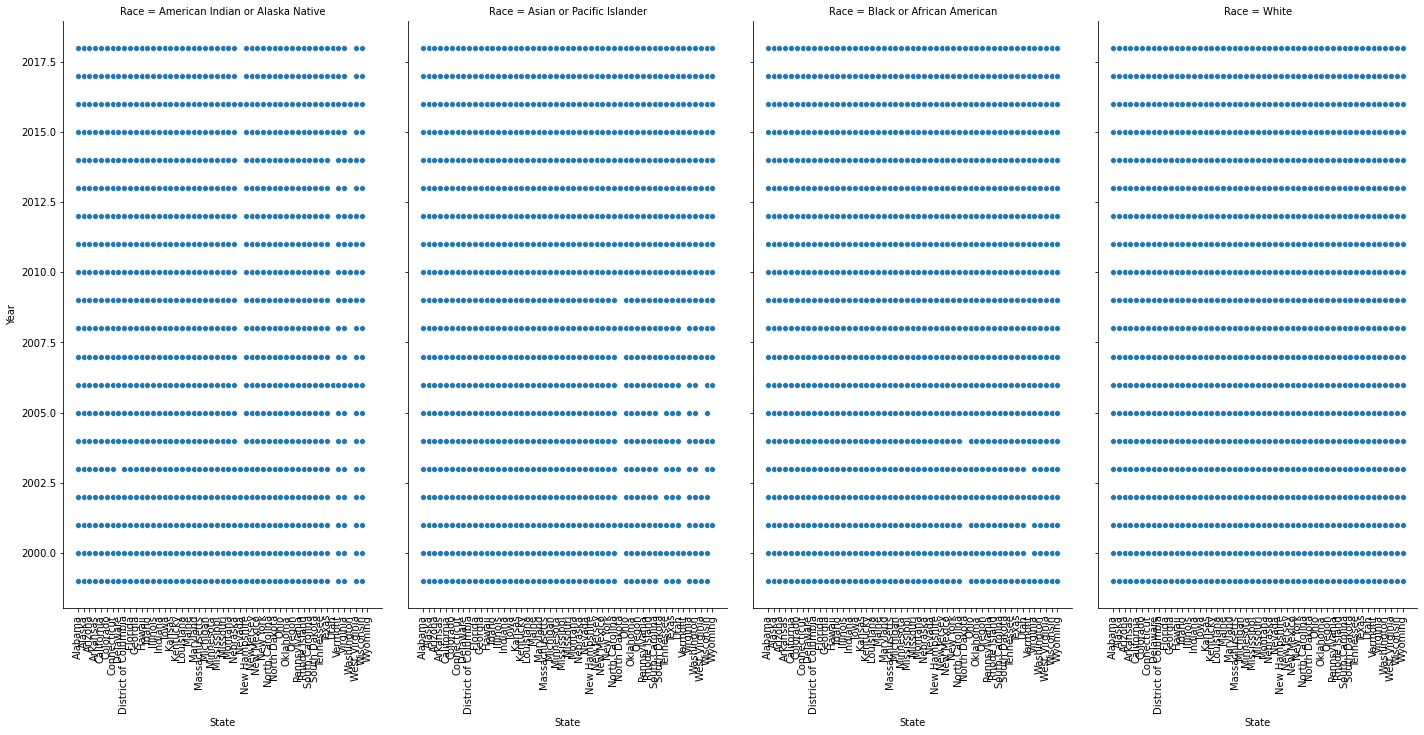

In [29]:
g=sns.relplot(x='State',y='Year', data=df, kind="scatter",col='Race')
fig = plt.gcf()
fig.set_size_inches(20, 10)
g.set_xticklabels(rotation=90)

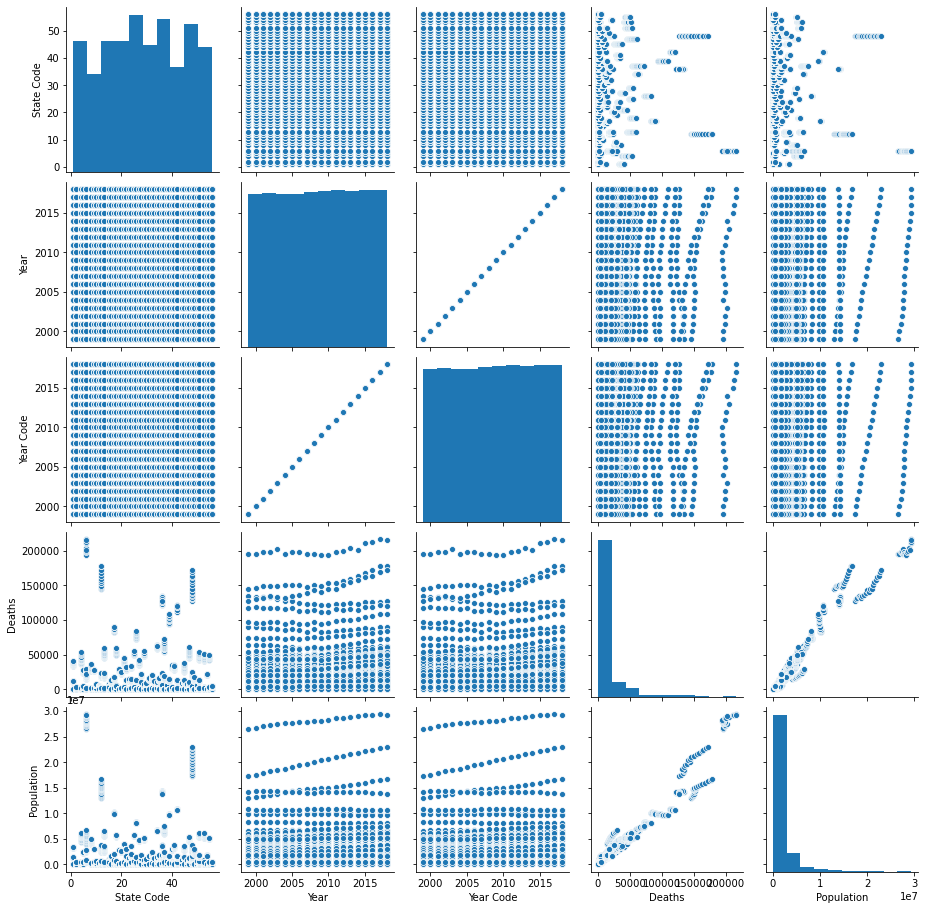

In [23]:
ax = sns.pairplot(df)

DataError: No numeric types to aggregate

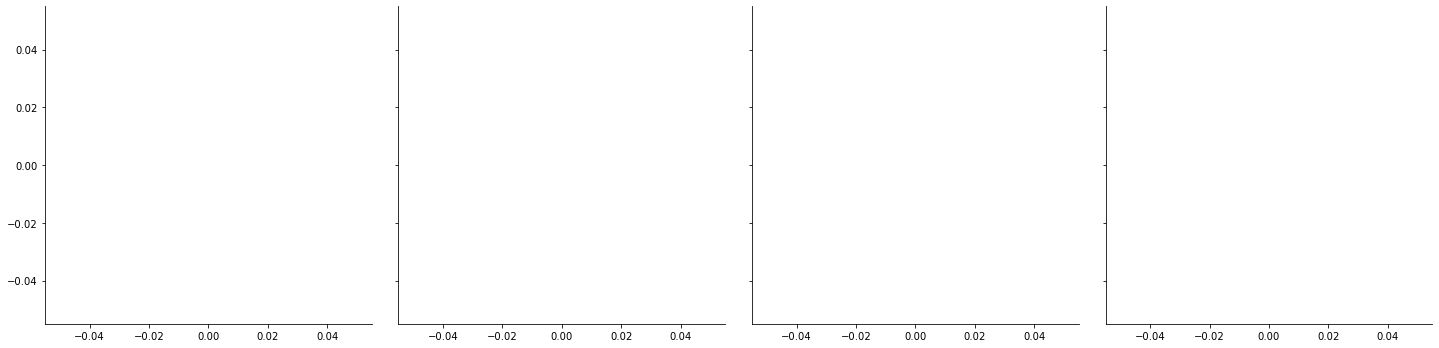

In [24]:
g= sns.relplot(x='State',y='Crude Rate', kind='line', data=df, col='Race')
fig = plt.gcf()
fig.set_size_inches(25, 10)
g.set_xticklabels(rotation=90)

C:\Users\sbatt\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


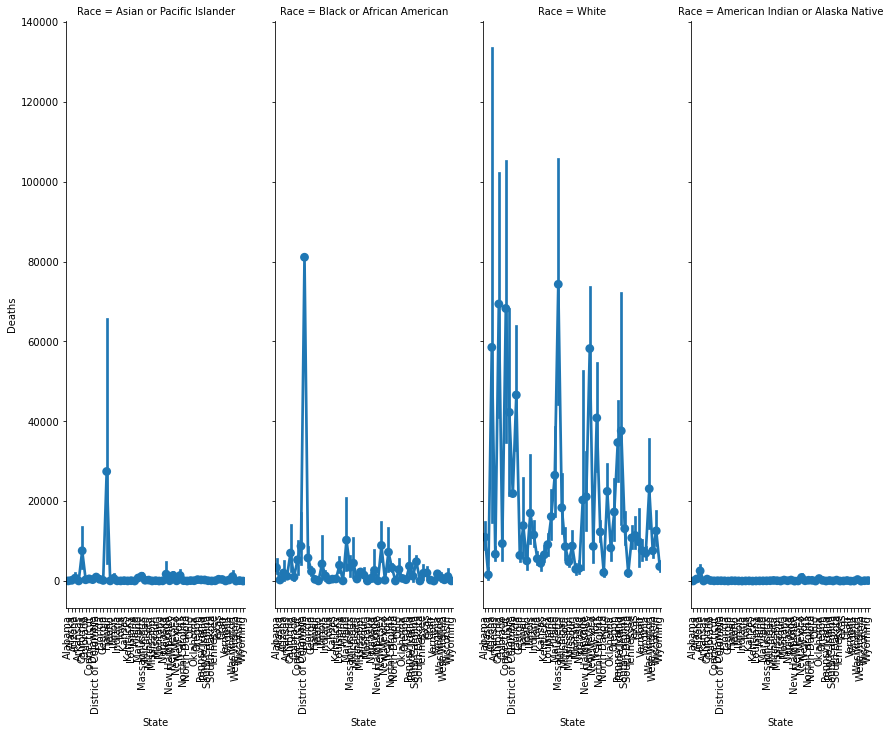

In [197]:
g= sns.factorplot(x='State',y='Deaths', data=df, col='Race')
fig = plt.gcf()
fig.set_size_inches(12, 10)
g.set_xticklabels(rotation=90)

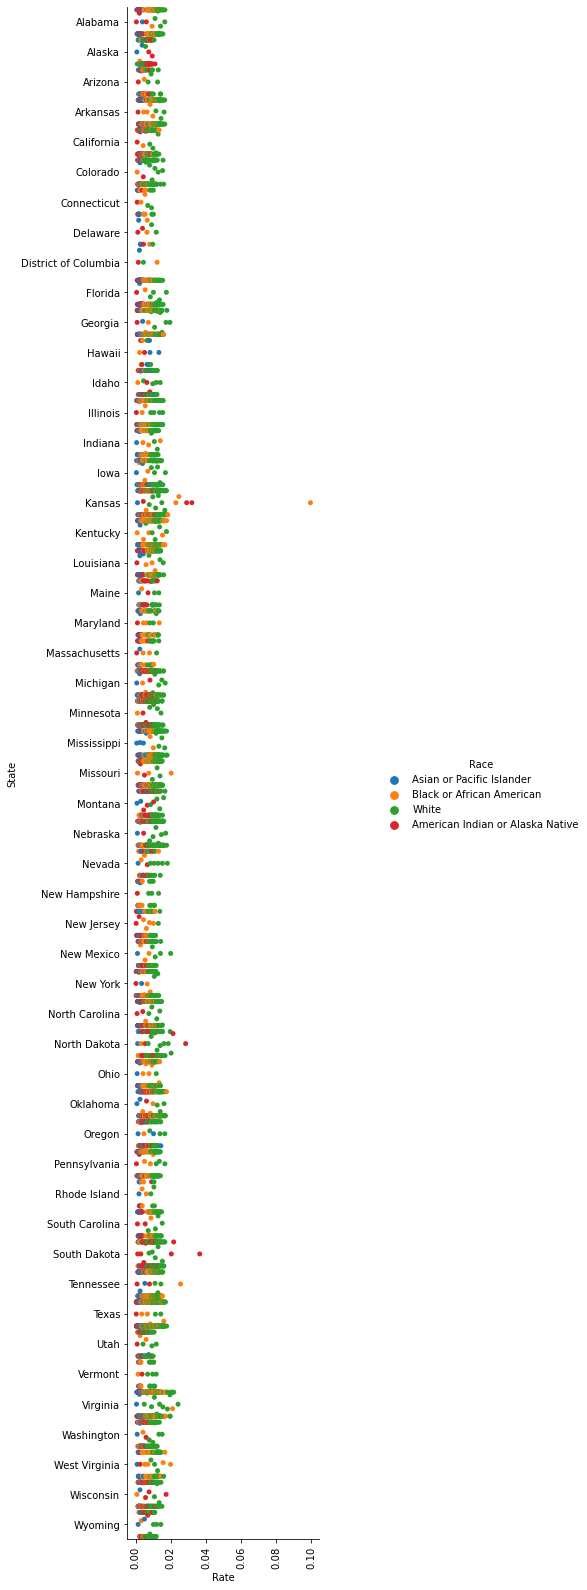

In [199]:
g= sns.catplot(x='Rate',y='State', hue="Race", data=df, kind="swarm")
fig = plt.gcf()
fig.set_size_inches(10, 25)
g.set_xticklabels(rotation=90)